In [20]:
import torch
import torch.nn as nn
import torchvision.datasets as normal_datasets
import torchvision.transforms as transforms
from torch.autograd import Variable
from matplotlib import pyplot as plt

## Dataset Download and Loader

In [29]:
# Hyper Parameters
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MINIST Dataset
train_dataset = normal_datasets.MNIST(root='../data/MNIST/',       # Data set save path
                            train=True,                      # Whether to use as a training set
                            transform=transforms.ToTensor(), # How the data is handled, can be customised by user
                            download=True)                   # If there is no data under the path, excute download

test_dataset = normal_datasets.MNIST(root='../data/MNIST/',
                           train=False,
                           transform=transforms.ToTensor())

# Data Loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

print("There is", len(train_dataset), "samples in the training dataset")

There is 60000 samples in the training dataset


Let's have a look on a single sample:

Feature batch shape: torch.Size([100, 1, 28, 28])
Labels batch shape: torch.Size([100])


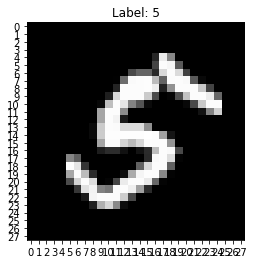

Input features: torch.Size([28, 28])
	tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 

In [28]:
train_features, train_labels = next(iter(train_loader))
# train_features = train_features.unsqueeze(dim=1)
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
fig, axis = plt.subplots()
axis.imshow(img, cmap="gray")

axis.set(title=f"Label: {label}", xticks=range(28), yticks=range(28))
plt.show()
print(f"Input features: {img.shape}\n\t{img}")
print(f"Label: {label.shape}\n\t{label}")

## CNN Model

In [8]:
# Two-layer convolution
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Quick build with sequence tools
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7 * 7 * 32, 10)

    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = out.view(out.size(0), -1)  # reshape
        out = self.fc(out)
        return out

cnn = CNN()

## Loss and Optimizer

In [9]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate)

## Train the model

In [10]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images)
        labels = Variable(labels)

        # Forward + Backward + Optimize 
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f'
                  % (epoch + 1, num_epochs, i + 1, len(train_dataset) // batch_size, loss.item()))

Epoch [1/2], Iter [100/600] Loss: 0.1863
Epoch [1/2], Iter [200/600] Loss: 0.1401
Epoch [1/2], Iter [300/600] Loss: 0.0608
Epoch [1/2], Iter [400/600] Loss: 0.0596
Epoch [1/2], Iter [500/600] Loss: 0.1191
Epoch [1/2], Iter [600/600] Loss: 0.0105
Epoch [2/2], Iter [100/600] Loss: 0.0413
Epoch [2/2], Iter [200/600] Loss: 0.0759
Epoch [2/2], Iter [300/600] Loss: 0.0461
Epoch [2/2], Iter [400/600] Loss: 0.0218
Epoch [2/2], Iter [500/600] Loss: 0.0540
Epoch [2/2], Iter [600/600] Loss: 0.0614


## Test models

In [11]:
cnn.eval()  # Change to test form, application scenarios such as: dropout
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images)
    labels = Variable(labels)

    outputs = cnn(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels.data).sum()

print(' Test Accuracy: %d %%' % (100 * correct / total))

# Save the Trained Model
# torch.save(cnn.state_dict(), 'cnn.pkl')

 Test Accuracy: 98 %


## Testing ...

In [19]:
print("outputs has a shape of:", outputs.shape)
print("\tthe 1st item is:", outputs[1].shape, outputs[1])

print("predicted has a shape of:", predicted.shape)
print("\tthe 1st item is:", predicted[1].shape, predicted[1])

print("labels has a shape of:", labels.shape)
print("\tthe 1st item is:", labels[1].shape, labels[1])

outputs has a shape of: torch.Size([100, 10])
	the 1st item is: torch.Size([10]) tensor([-13.2574, -10.0488,  -8.4100,  -2.0870,  -1.5191,  -0.7316, -12.9977,
         -4.3090,  -2.7273,   7.5589], grad_fn=<SelectBackward0>)
predicted has a shape of: torch.Size([100])
	the 1st item is: torch.Size([]) tensor(9)
labels has a shape of: torch.Size([100])
	the 1st item is: torch.Size([]) tensor(9)
